In [1021]:
import pandas as pd
import numpy as np
from importlib import reload
from stock_data_functions import TickerData
import time 
import datetime as dt
import read_in_data_functions
reload(read_in_data_functions)
from read_in_data_functions import get_sub_sectors_tickers, get_sub_sectors_names
from math import isnan

from stock_data_functions import calc_log_rets
filing_date = dt.datetime.today().date() - pd.Timedelta(days=365*2 -1)
pd.set_option('future.no_silent_downcasting', True)


In [509]:
sub_sector_names      = get_sub_sectors_names()
sub_sector_dict       = { 
    'Healthcare' : sub_sector_names[0],
    'Financials' : sub_sector_names[1],
    'Technology' : sub_sector_names[2],
    'Energy'     : sub_sector_names[3],
    'Industrials': sub_sector_names[4],
    'Communication Services' : sub_sector_names[5],
    'Consumer Staples' : sub_sector_names[6],
    'Materials' : sub_sector_names[7],
    'Consumer Discretionary' : sub_sector_names[8],
    'Real Estate' : sub_sector_names[9],
    'Utilities' : sub_sector_names[10]
}

In [195]:
sub_sectors = df_comm_service.columns.get_level_values(0).unique()
sub_sectors2 = df_materials.columns.get_level_values(0).unique()

n = 10
ticker_groups = {}
ticker_groups2 = {}

for i in sub_sectors:
    ticker_groups[i]  = df_comm_service.loc[:, (i,'Symbol')][:n]

for k in sub_sectors2:
    ticker_groups2[k]  = df_materials.loc[:, (k,'Symbol')][:n]


In [197]:


failed = []
frames = {}

for key in ticker_groups.keys():
    
    stocks_per_sub = {}

    for count,i in enumerate(ticker_groups[key]):
        print(i, count)
        if count % 4 == 0 and count > 0:
            time.sleep(60)
        else:
            try:
                ticker_obj = TickerData(i, filing_date)
                ticker_obj.get_historical_prices(limit = 500000)
                stocks_per_sub[i] = ticker_obj.historical_prices.drop(columns=['timestamp', 'otc'])
            
            except Exception as e:
                failed.append(f'Ticker {i} failed due to : {e}')
                print(f'failed at {i}')
                time.sleep(60)

    frames[key] = pd.concat(stocks_per_sub, axis = 1)
    

GOOGL 0
Call GOOGL.calc_zscore_and_rets() to get returns data
Request URL: https://api.polygon.io/v2/aggs/ticker/GOOGL/range/1/day/2023-10-10/2025-10-08?limit=500000
Request Headers: {'Authorization': 'Bearer REDACTED', 'Accept-Encoding': 'gzip', 'User-Agent': 'Polygon.io PythonClient/1.15.3'}
Response Headers: {'Date': 'Thu, 09 Oct 2025 00:06:38 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding', 'X-Polygon-Cluster-Name': 'polygon-ny5', 'X-Request-Id': '60c6409e3f5fdf16d24335ae92986086', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains'}
META 1
Call META.calc_zscore_and_rets() to get returns data
Request URL: https://api.polygon.io/v2/aggs/ticker/META/range/1/day/2023-10-10/2025-10-08?limit=500000
Request Headers: {'Authorization': 'Bearer REDACTED', 'Accept-Encoding': 'gzip', 'User-Agent': 'Polygon.io PythonClient/1.15.3'}
Response Headers: {'Date': 'Thu, 09 Oct 2

In [1291]:
pd.concat(stocks_per_sub)

open     high    low  close    volume     vwap  transactions
     Date                                                                     
SCHL 2023-10-10  37.70  38.1800  36.52  36.55  221157.0  36.9690          5257
     2023-10-11  36.38  37.5000  36.38  37.50  203978.0  37.2698          4029
     2023-10-12  37.40  37.5000  37.01  37.46  147604.0  37.3205          4705
     2023-10-13  37.26  37.3450  36.73  37.13  173211.0  37.0453          4653
     2023-10-16  37.25  37.6300  37.12  37.49  176821.0  37.4642          4285
...                ...      ...    ...    ...       ...      ...           ...
WLY  2025-10-01  40.41  40.4950  39.76  40.15  299288.0  40.1665          7859
     2025-10-02  40.00  40.3701  39.49  40.07  313012.0  39.9290          9285
     2025-10-03  40.14  40.9000  39.93  39.96  300200.0  40.2363          8952
     2025-10-06  40.00  40.1200  38.38  38.65  432880.0  38.8854         10089
     2025-10-07  38.13  38.5600  37.93  38.33  321197.0  38.3125          8115

[3208 rows x 7 columns]

In [199]:
comm_rets = pd.concat(frames, axis =1)
comm_rets.to_csv(r'Daily/Daily_Communication_Services_2025-08-10_prices.csv')
materials_rets = pd.concat(frames2, axis=1)
materials_rets.to_csv(r'Daily/Daily_Materials_2025-08-10_prices.csv')

In [1294]:
tickers_map.columns.get_level_values(0)

Index(['semiconductors', 'software-infrastructure', 'consumer-electronics',
       'software-application', 'semiconductor-equipment-and-materials',
       'information-technology-services', 'communication-equipment',
       'computer-hardware', 'electronic-components',
       'scientific-and-technical-instruments', 'solar',
       'electronics-and-computer-distribution'],
      dtype='object')

In [1301]:
sector_name     = 'Technology'
df              = pd.read_csv(rf'Daily/Daily_{sector_name}_2025-08-10_prices.csv', index_col = [0], header=[0,1,2], parse_dates=True)
tickers_map     = get_sub_sectors_tickers(sector_name)

In [1333]:
tickers_map.columns.get_level_values(0).unique()

Index(['semiconductors', 'software-infrastructure', 'consumer-electronics',
       'software-application', 'semiconductor-equipment-and-materials',
       'information-technology-services', 'communication-equipment',
       'computer-hardware', 'electronic-components',
       'scientific-and-technical-instruments', 'solar',
       'electronics-and-computer-distribution'],
      dtype='object')

In [1375]:
subsector_name = tickers_map.columns.get_level_values(0).unique()[8]
tickers = tickers_map[subsector_name]
subsector_name

'electronic-components'

In [1376]:
sector_df_example = df.loc[:, (subsector_name, slice(None), 'close')]

# Drop when the data is so bad
thresh            = 100
null_df_count     = sector_df_example.isnull().sum()
stocks_to_drop    = null_df_count[null_df_count > thresh].index.get_level_values(1)
sector_df_example = sector_df_example.drop(columns=stocks_to_drop, level=1)
sector_df_rets    = sector_df_example.apply(calc_log_rets)


In [1377]:
# Get the tickers we are analysing
names = df.xs(subsector_name, axis=1).columns.get_level_values(0).unique()
tickers[tickers['Symbol'].isin(df.xs(subsector_name, axis=1).columns.get_level_values(0).unique())]

,Symbol,Market Cap
0,DAKT,953.62
1,ALNT,811.25
2,LYTS,646.98
3,KOPN,502.23
5,MEI,256.03
6,KULR,214.47
7,RELL,171.89
8,MPTI,163.33


In [1378]:
sector_df_rets.droplevel(0, axis=1).corr()

,,DAKT,ALNT,LYTS,KOPN,MEI,KULR,MPTI,RELL
,,close,close,close,close,close,close,close,close
DAKT,close,1.000000,0.291116,0.317998,0.199273,0.234921,0.068778,0.089813,0.239299
ALNT,close,0.291116,1.000000,0.492187,0.223673,0.384027,0.122574,0.089650,0.290556
LYTS,close,0.317998,0.492187,1.000000,0.241754,0.307298,0.101422,0.118022,0.292539
KOPN,close,0.199273,0.223673,0.241754,1.000000,0.208850,0.147195,0.132926,0.271405
MEI,close,0.234921,0.384027,0.307298,0.208850,1.000000,0.081925,0.094123,0.236951
KULR,close,0.068778,0.122574,0.101422,0.147195,0.081925,1.000000,-0.013625,0.099604
MPTI,close,0.089813,0.089650,0.118022,0.132926,0.094123,-0.013625,1.000000,0.112969
RELL,close,0.239299,0.290556,0.292539,0.271405,0.236951,0.099604,0.112969,1.000000


In [1382]:
reload(stock_data_functions)
from stock_data_functions import TickerData, TickerComparison
names

Index(['DAKT', 'ALNT', 'LYTS', 'KOPN', 'MEI', 'KULR', 'MPTI', 'RELL'], dtype='object')

In [ ]:
comparison = TickerComparison(names, filing_date_gte='2023-09-10', waiting_time=0)
comparison.get_ratios()


Counter : 0
Processing DAKT : 1 of 8
Call DAKT.calc_zscore_and_rets() to get returns data
Counter : 1
Processing ALNT : 2 of 8
Call ALNT.calc_zscore_and_rets() to get returns data
Counter : 2
Processing LYTS : 3 of 8
Call LYTS.calc_zscore_and_rets() to get returns data
Counter : 3
Processing KOPN : 4 of 8
Call KOPN.calc_zscore_and_rets() to get returns data
Counter : 4
Processing MEI : 5 of 8
Call MEI.calc_zscore_and_rets() to get returns data
Counter : 5
Processing KULR : 6 of 8
Call KULR.calc_zscore_and_rets() to get returns data
Counter : 6
Processing MPTI : 7 of 8
Call MPTI.calc_zscore_and_rets() to get returns data
Counter : 7
Processing RELL : 8 of 8
Call RELL.calc_zscore_and_rets() to get returns data
Daily/Earnings/DAKT_2025-10-08.csv
Call DAKT.calc_zscore_and_rets() to get returns data
Daily/Earnings/ALNT_2025-10-08.csv
Call ALNT.calc_zscore_and_rets() to get returns data
Daily/Earnings/LYTS_2025-10-08.csv
Call LYTS.calc_zscore_and_rets() to get returns data
Daily/Earnings/KOP

DAKT                                                  \
                open z open bucket open      high z high bucket high   
Date                                                                   
2023-10-11  0.011771    NaN         NaN -0.001037    NaN         NaN   
2023-10-12  0.015831    NaN         NaN -0.009380    NaN         NaN   
2023-10-13 -0.016896    NaN         NaN -0.009469    NaN         NaN   
2023-10-16 -0.028080    NaN         NaN -0.002116    NaN         NaN   
2023-10-17  0.031269    NaN         NaN  0.022002    NaN         NaN   
...              ...    ...         ...       ...    ...         ...   
2025-10-02 -0.002896    NaN         NaN -0.005302    NaN         NaN   
2025-10-03 -0.019030    NaN         NaN -0.016324    NaN         NaN   
2025-10-06 -0.011893    NaN         NaN -0.009626    NaN         NaN   
2025-10-07 -0.029339    NaN         NaN -0.025984    NaN         NaN   
2025-10-08  0.001539    NaN         NaN  0.018016    NaN         NaN   

                                                 ...         RELL            \
                 low z low bucket low     close  ... bucket close      vwap   
Date                                             ...                          
2023-10-11  0.011771   NaN        NaN  0.005311  ...          NaN  0.011556   
2023-10-12 -0.013926   NaN        NaN -0.008511  ...          NaN -0.056109   
2023-10-13 -0.028448   NaN        NaN -0.037001  ...          NaN  0.000589   
2023-10-16  0.008840   NaN        NaN  0.044452  ...          NaN -0.002396   
2023-10-17  0.029270   NaN        NaN  0.017867  ...          NaN  0.016471   
...              ...   ...        ...       ...  ...          ...       ...   
2025-10-02 -0.006694   NaN        NaN -0.023103  ...          NaN -0.001949   
2025-10-03 -0.017566   NaN        NaN -0.009493  ...          NaN  0.008661   
2025-10-06 -0.030323   NaN        NaN -0.022849  ...          NaN -0.001045   
2025-10-07 -0.005763   NaN        NaN -0.001028  ...          NaN -0.006334   
2025-10-08  0.006540   NaN        NaN  0.025382  ...          NaN  0.280455   

                                                                              \
           z vwap bucket vwap  intraday z intraday bucket intraday overnight   
Date                                                                           
2023-10-11    NaN         NaN -0.014222        NaN             NaN  0.016015   
2023-10-12    NaN         NaN -0.085741        NaN             NaN  0.023884   
2023-10-13    NaN         NaN  0.020581        NaN             NaN  0.007590   
2023-10-16    NaN         NaN -0.008368        NaN             NaN  0.000000   
2023-10-17    NaN         NaN  0.022285        NaN             NaN -0.005618   
...           ...         ...       ...        ...             ...       ...   
2025-10-02    NaN         NaN -0.011488        NaN             NaN  0.002079   
2025-10-03    NaN         NaN -0.002083        NaN             NaN  0.009409   
2025-10-06    NaN         NaN -0.011370        NaN             NaN  0.014493   
2025-10-07    NaN         NaN  0.014330        NaN             NaN  0.008282   
2025-10-08    NaN         NaN  0.063220        NaN             NaN  0.012121   

                                         
           z overnight bucket overnight  
Date                                     
2023-10-11         NaN              NaN  
2023-10-12         NaN              NaN  
2023-10-13         NaN              NaN  
2023-10-16         NaN              NaN  
2023-10-17         NaN              NaN  
...                ...              ...  
2025-10-02         NaN              NaN  
2025-10-03         NaN              NaN  
2025-10-06         NaN              NaN  
2025-10-07         NaN              NaN  
2025-10-08         NaN              NaN  

[500 rows x 168 columns]

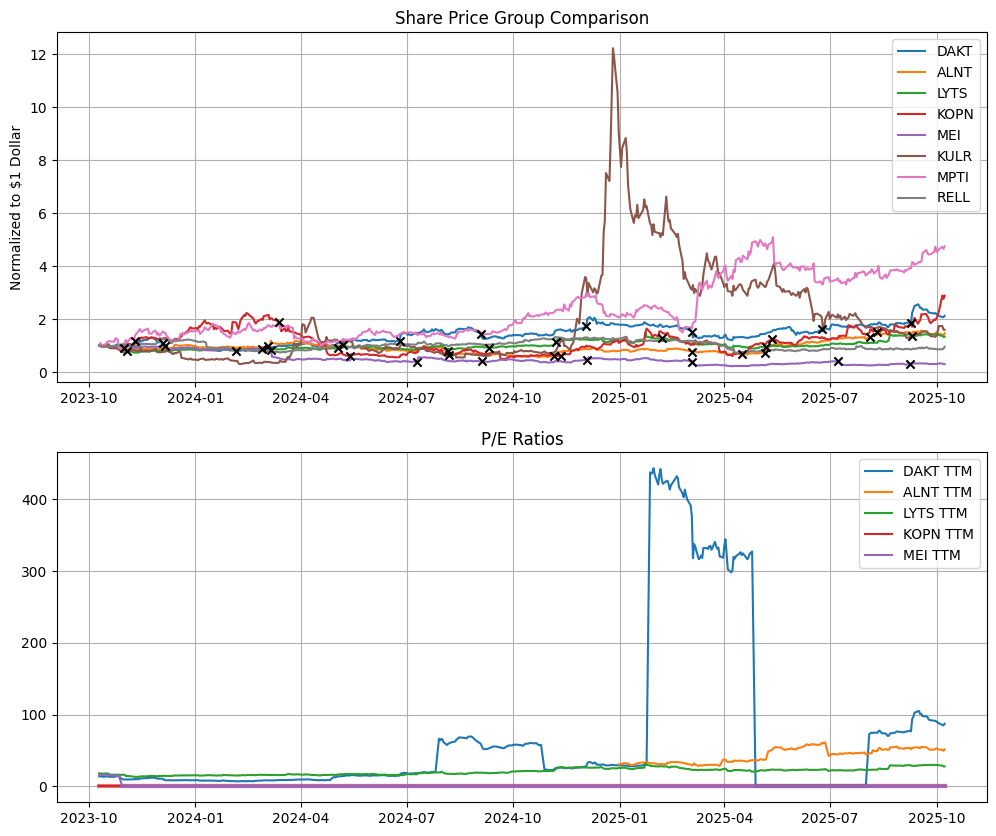

In [1384]:
comparison.plot_time_series()